# World Happiness 2015

# Introduction

> The World Happiness Report is a landmark survey of the state of global happiness. This project will use the report that was published in 2015. The World Happiness 2015, which ranks 158 countries by their happiness level, was released at the United Nation at an event celebrating International Day of Happiness. The report continues to gain global recognition as governments, organization, and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

## Metadata

-  Country: Name of the country (String)
-  Region: Region the country belongs to (String)
-  Happiness Rank: Rank of the country based on the Happiness Score. (Numeric)
-  Happiness Score: A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest" (Numeric)
-  Standard Error: Help us describe this column... (Numeric)
-  Economy (GDP per Capita): The extent to which GDP contributes to the calculation of the Happiness Score. (Numeric)
-  Family: The extent to which Family contributes to the calculation of the Happiness Score (Numeric)
-  Health (Life Expectancy): The extent to which Life expectancy contributed to the calculation of the Happiness Score (Numeric)
-  Freedom: The extent to which Freedom contributed to the calculation of the Happiness Score (Numeric)
-  Trust (Government Corruption): The extent to which Perception of Corruption contributes to Happiness Score (Numeric)
-  Generosity: The extent to which Generosity contributed to the calculation of the Happiness Score (Numeric)
-  Dystopia Residual: The extent to which Dystopia Residual contributed to the calculation of the Happiness Score. (Numeric)

# Data Preprocessing

## Loading Libraries

In [1]:
library(ggplot2)
library(dplyr)
library(sampling)

Warning message:
"package 'ggplot2' was built under R version 3.4.2"Warning message:
"package 'dplyr' was built under R version 3.4.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'sampling' was built under R version 3.4.2"

## Loading Data

In [2]:
df <- read.csv('Happiness_2015.csv')
head(df)

Country,Region,Happiness.Rank,Happiness.Score,Standard.Error,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Trust..Government.Corruption.,Generosity,Dystopia.Residual
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955


Checking if there is any missing data

In [3]:
colSums(sapply(df, is.na))

Country                        Region 
                            0                             0 
               Happiness.Rank               Happiness.Score 
                            0                             0 
               Standard.Error      Economy..GDP.per.Capita. 
                            0                             0 
                       Family      Health..Life.Expectancy. 
                            0                             0 
                      Freedom Trust..Government.Corruption. 
                            0                             0 
                   Generosity             Dystopia.Residual 
                            0                             0

## Data Summary

In [4]:
summary(df)
cat('Data has', dim(df)[1], 'rows and', dim(df)[2], 'columns.')

        Country                                Region   Happiness.Rank  
 Afghanistan:  1   Sub-Saharan Africa             :40   Min.   :  1.00  
 Albania    :  1   Central and Eastern Europe     :29   1st Qu.: 40.25  
 Algeria    :  1   Latin America and Caribbean    :22   Median : 79.50  
 Angola     :  1   Western Europe                 :21   Mean   : 79.49  
 Argentina  :  1   Middle East and Northern Africa:20   3rd Qu.:118.75  
 Armenia    :  1   Southeastern Asia              : 9   Max.   :158.00  
 (Other)    :152   (Other)                        :17                   
 Happiness.Score Standard.Error    Economy..GDP.per.Capita.     Family      
 Min.   :2.839   Min.   :0.01848   Min.   :0.0000           Min.   :0.0000  
 1st Qu.:4.526   1st Qu.:0.03727   1st Qu.:0.5458           1st Qu.:0.8568  
 Median :5.232   Median :0.04394   Median :0.9102           Median :1.0295  
 Mean   :5.376   Mean   :0.04788   Mean   :0.8461           Mean   :0.9910  
 3rd Qu.:6.244   3rd Qu.:0.0523

Data has 158 rows and 12 columns.

# Analyzing Data

## Top 10 Happiest Countries 

In [5]:
top10<-df %>% filter(Happiness.Rank<=10)%>% arrange((Happiness.Rank))
top10

Warning message:
"package 'bindrcpp' was built under R version 3.4.2"

Country,Region,Happiness.Rank,Happiness.Score,Standard.Error,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Trust..Government.Corruption.,Generosity,Dystopia.Residual
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


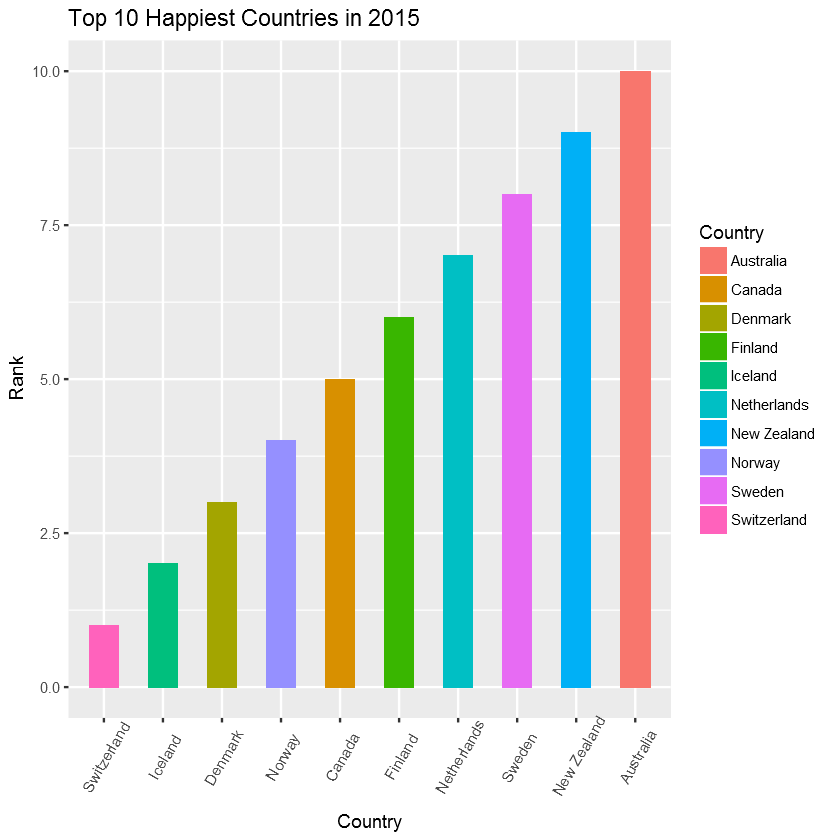

In [6]:
g1 <- ggplot(top10, aes(x=factor(Country,levels=Country), y=Happiness.Rank, fill=Country))
g1 <- g1 + geom_bar(stat="identity",width=0.5)
g1 <- g1 + theme(axis.text.x = element_text(angle=60, vjust=0.6))
g1 <- g1 + labs(title = 'Top 10 Happiest Countries in 2015', x = 'Country', y = 'Rank')
g1

- Most of the happiest countries are in Europe. There is no country from Asia or Africa. All Scadinavian countries are here, while Nordic countries have 2 countries. 

## Happiness Score Based on Regions

In [7]:
region<-df %>% select(Region,Happiness.Rank,Happiness.Score) %>% group_by(Region)%>% 
  summarize(Happiness_Rank=sum(Happiness.Rank),Happiness_Score=sum(Happiness.Score))
region <- region %>% mutate(rank = dense_rank(desc(Happiness_Score)))
region <- arrange(region, rank)
region

Region,Happiness_Rank,Happiness_Score,rank
Sub-Saharan Africa,5116,168.112,1
Central and Eastern Europe,2291,154.655,2
Western Europe,620,140.482,3
Latin America and Caribbean,1032,135.183,4
Middle East and Northern Africa,1552,108.138,5
Southeastern Asia,731,47.857,6
Eastern Asia,387,33.757,7
Southern Asia,792,32.066,8
Australia and New Zealand,19,14.570,9
North America,20,14.546,10


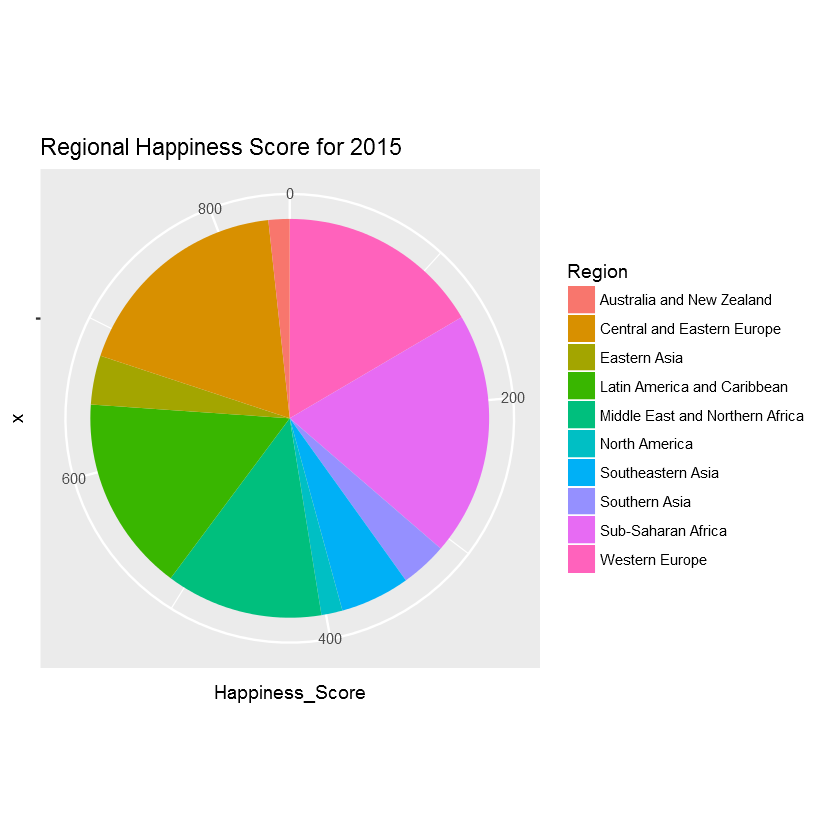

In [8]:
g2<- ggplot(region, aes(x="", y=Happiness_Score, fill=Region))+
  geom_bar(width = 1, stat = "identity")

g2 + coord_polar("y")+labs(title="Regional Happiness Score for 2015")

## Bar Plot

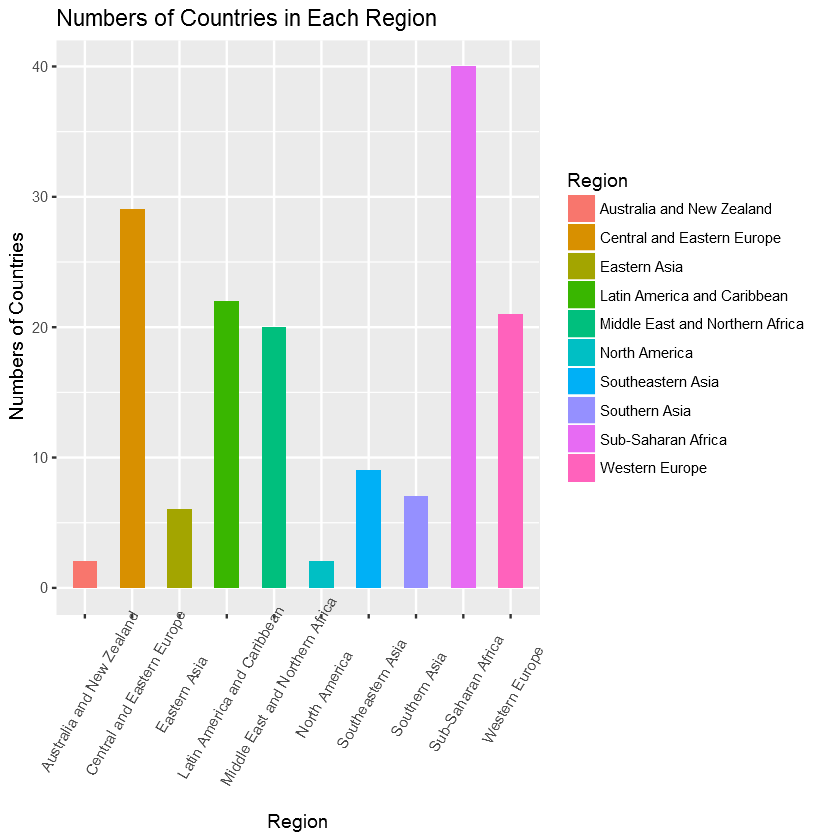

In [9]:
region.count <- df %>% count(Region)

g3 <- ggplot(region.count, aes(x= Region, y= n, fill=Region))
g3 <- g3 + geom_bar(stat="identity",width=0.5)
g3 <- g3 + theme(axis.text.x = element_text(angle=60, vjust=0.6))
g3 <- g3 + labs(title = 'Numbers of Countries in Each Region', x = 'Region', y = 'Numbers of Countries')
g3

## Examine the Happiness Score

Score,n
3,5
4,30
5,53
6,39
7,27
8,4


data
         3          4          5          6          7          8 
0.03164557 0.18987342 0.33544304 0.24683544 0.17088608 0.02531646 

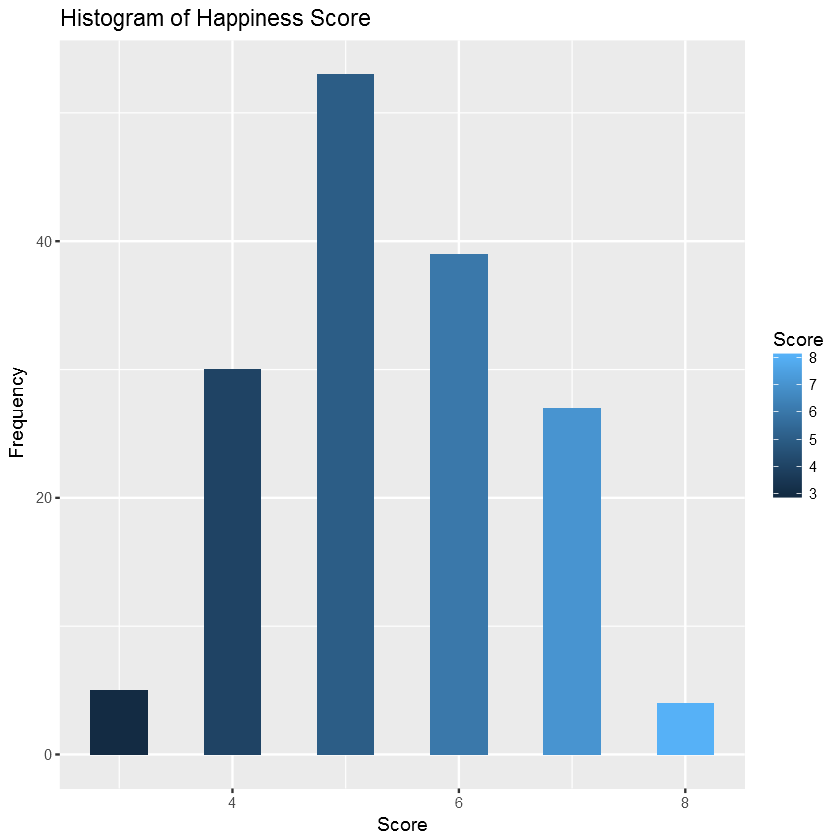

In [10]:
data <- round(df$Happiness.Score)

data.count <- df %>% count (Score = round(Happiness.Score))
data.count

table(data)/length(data)

g4 <- ggplot(data.count, aes(x = Score, y =  n, fill = Score))
g4 <- g4 + geom_bar(stat="identity",width=0.5)
g4 <- g4 + labs(title = 'Histogram of Happiness Score', x = 'Score', y = 'Frequency')
g4

- From the histogram, we can see that the histogram is skewed to the right. Most countries have the score of 5 in happiness. 

### Density Curve

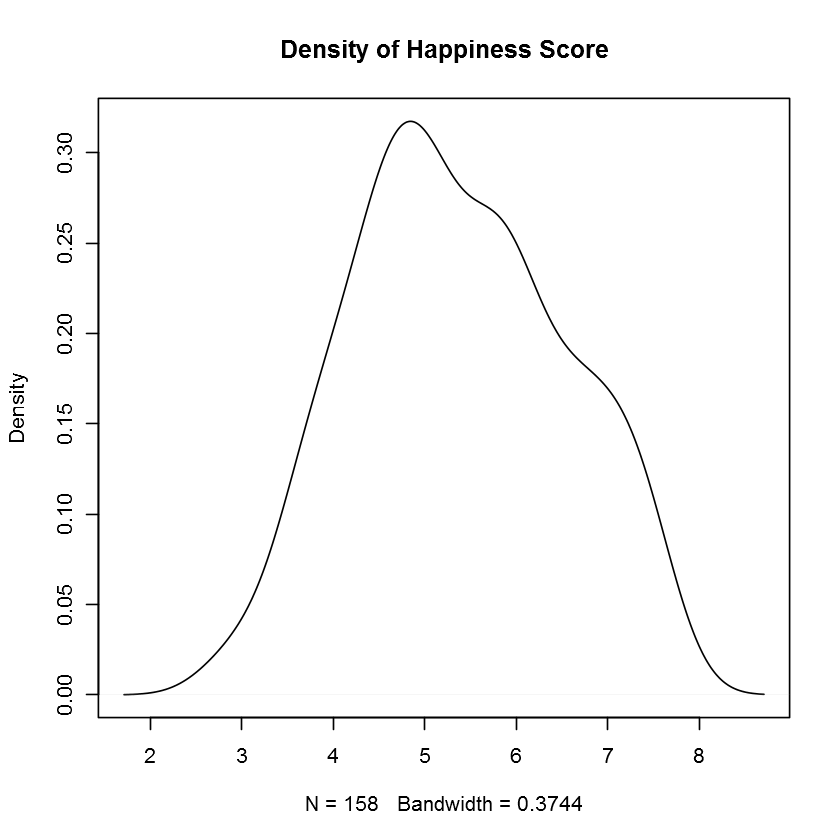

In [11]:
d <- density(df$Happiness.Score)
plot(d, main = 'Density of Happiness Score')

- This showed that the dataset is a normal distribution, however, it is not a perfect one as it was not symetrical. 

### Histogram and Density plot 

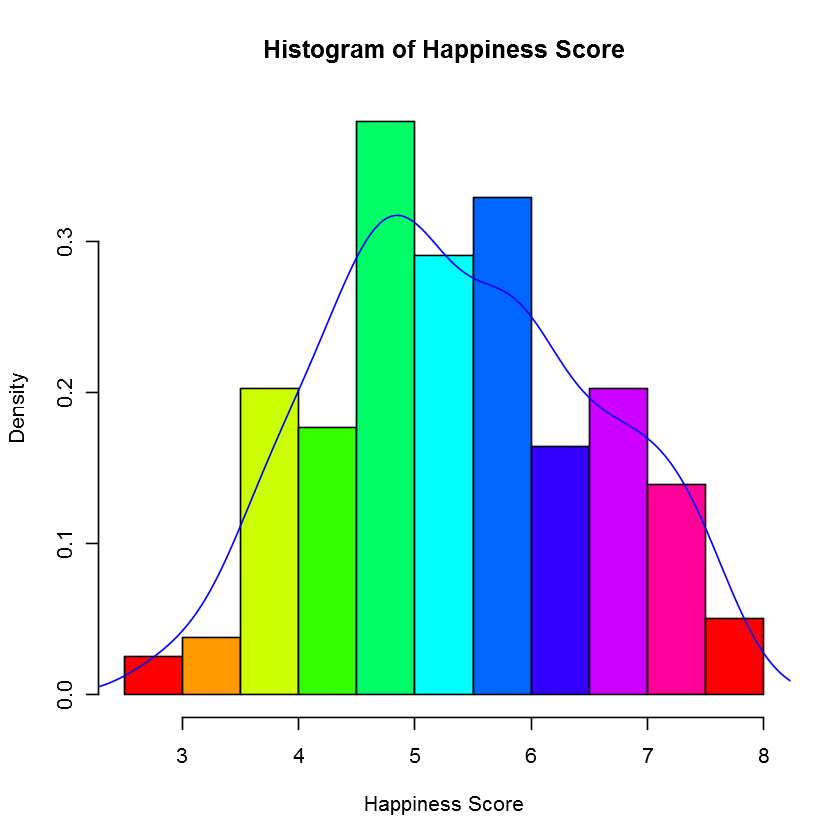

In [12]:
h <- hist(df$Happiness.Score, prob=TRUE,
          col = rainbow(10), xlab = 'Happiness Score', main = 'Histogram of Happiness Score' )
lines(density(df$Happiness.Score), col='blue')

- This confirmed that the data is indeed skewed to the right. The data also has peak at 6 and 7 as well, which explaines the roughness on the right side of the data.

### Boxplot

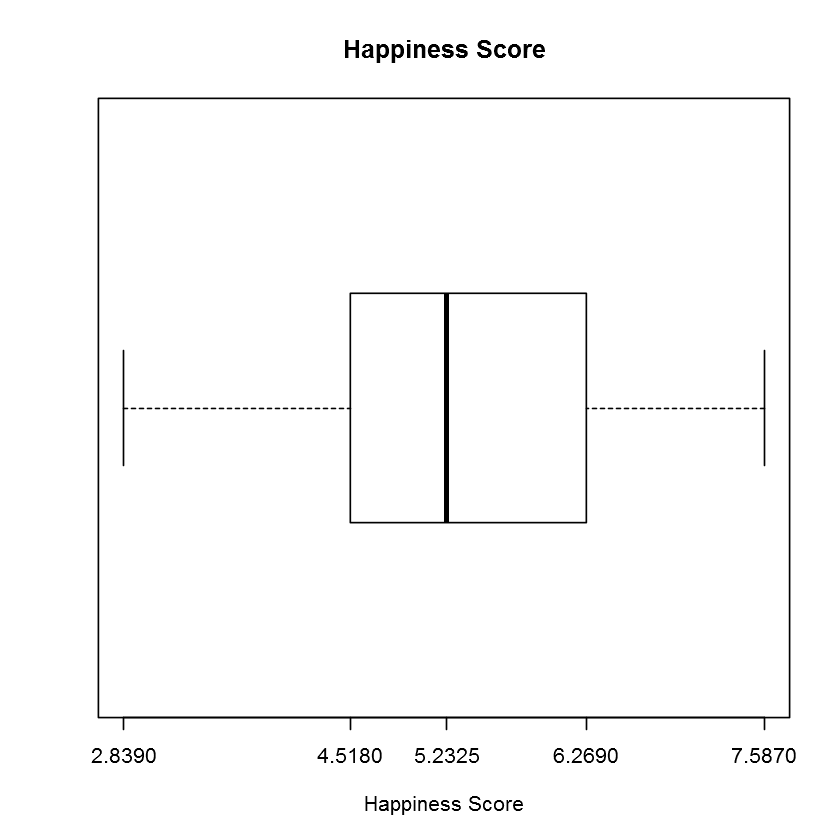

In [13]:
boxplot(df$Happiness.Score, horizontal = TRUE, main = 'Happiness Score', xlab = 'Happiness Score', xaxt = 'n')
axis(side = 1, at = fivenum(df$Happiness.Score), labels = TRUE)

- The boxplot showed that the data skewd to the right. In addition, there is no outlier in the data. 

### Pie Plot

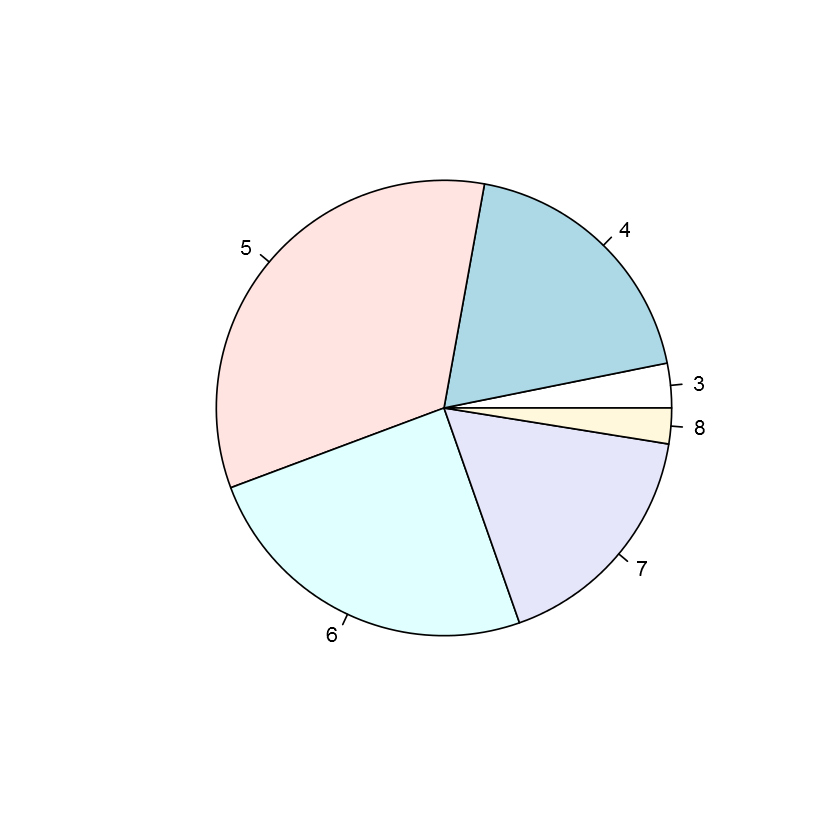

In [14]:
pie(table(data))

-  The pie plot showed that majority countries have the score of 4,5,6,7. There is no 1,2,9, or 10, which indicate that no country has people who are completely unhappy or happy with how the country is. Most of them are in neutral, with some happinesses and some unhappinesses with the country. 

## Central Limit Theorem

> According to theory, when independent random variables are added, their distribution tends toward a normal distribution or a bell curve. This is also true for the data that is not normal distributed originally. This theory is called Central Limit Theorm.

The sample sizes were ranged between 10, 20, 30, and 100.

Sample Size =  10  Mean =  5.379054  SD =  0.3570373 
Sample Size =  20  Mean =  5.376755  SD =  0.2563332 
Sample Size =  30  Mean =  5.373471  SD =  0.2089887 
Sample Size =  100  Mean =  5.376817  SD =  0.1145776 


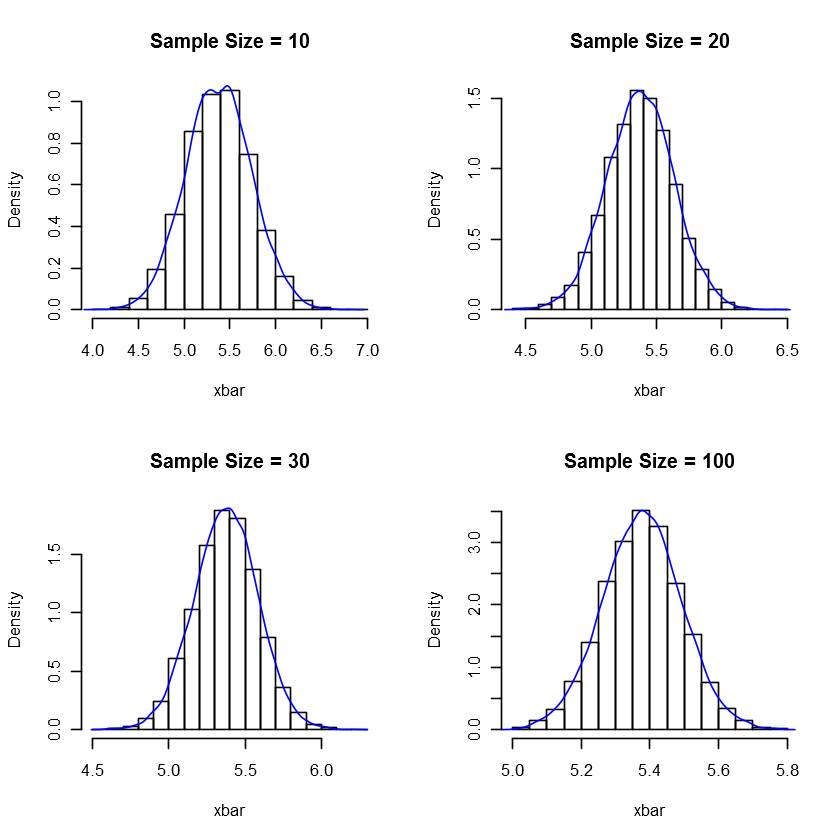

In [15]:
a <- mean(df$Happiness.Score)
b <- sd(df$Happiness.Score)

samples <- 10000

xbar <- numeric(samples)
par(mfrow = c(2,2))

for (size in c(10, 20, 30, 100)) {
  for (i in 1:samples) {
    xbar[i] <- mean(rnorm(size, 
                          mean = a, sd = b))
  }
  
  hist(xbar, prob = TRUE, 
       breaks = 15,
       main = paste("Sample Size =", size))
  
  lines(density(xbar), col='blue')
  
  
  cat("Sample Size = ", size, " Mean = ", mean(xbar),
      " SD = ", sd(xbar), "\n")
}

- The graphs proved that as the sample size increases, the density curve became smoother. The histogram data showed a central normal distribution graph as the sample size increases, instead of skewing to the right like the original one.

## Sampling Methods

> A sample is a portion of the population that is selected for doing the data analysis. Based on the result that is obtained from the sample, the polulation can be estimated. A frame is defined as a listing of items that define a poplation. Samples are drawn from the frames.

> There are two categories that samples can be classified, probability samples and nonprobability samples. Convenience sampling and judgmnet sampling are common nonprobability sampling technieques, while in probability sampling, the samples are determined based on known probability. Simple random sampling, systematic sampling, stratified sampling, and cluster sampling are examples of probablity sampling.

### Simple Random Sampling

> In this sampling, every item from a frame has the same chance of selection in the sample as every other item.

#### With Replacement 

In [16]:
set.seed(123)
#Number of score in each region is shown below 
table(df$Region)
#A simple random sample of size 50 is drawn from the population with replacement 
s <- srswr(50, nrow(df))

#The countries that are included in the above random sample correspond to the rows of the dataset as shown below 
rows <- (1:nrow(df))[s!=0]
rows <- rep(rows, s[s != 0])
cat('Rows that are picked:', rows)

#The data of the selected sample and the frequency of happiness score in each region are shown below 
sample.1 <- df[rows, ]
head(sample.1)
table(sample.1$Region)


      Australia and New Zealand      Central and Eastern Europe 
                              2                              29 
                   Eastern Asia     Latin America and Caribbean 
                              6                              22 
Middle East and Northern Africa                   North America 
                             20                               2 
              Southeastern Asia                   Southern Asia 
                              9                               7 
             Sub-Saharan Africa                  Western Europe 
                             40                              21 

Rows that are picked: 2 4 5 8 11 16 20 21 24 24 31 31 32 34 37 50 53 58 59 65 67 68 69 71 84 87 87 88 89 97 104 104 106 107 111 114 118 126 126 130 132 134 137 138 139 139 145 150 151 157

,Country,Region,Happiness.Rank,Happiness.Score,Standard.Error,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Trust..Government.Corruption.,Generosity,Dystopia.Residual
2,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
4,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
8,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
11,Israel,Middle East and Northern Africa,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
16,Brazil,Latin America and Caribbean,16,6.983,0.04076,0.98124,1.23287,0.69702,0.49049,0.17521,0.14574,3.26001



      Australia and New Zealand      Central and Eastern Europe 
                              0                              13 
                   Eastern Asia     Latin America and Caribbean 
                              1                               5 
Middle East and Northern Africa                   North America 
                              4                               1 
              Southeastern Asia                   Southern Asia 
                              4                               1 
             Sub-Saharan Africa                  Western Europe 
                             13                               8 

### Without Replacement 

In [17]:
set.seed(123)

#A simple random sample of size 50 is drawn from the population without replacement 
s1 <- srswor(50, nrow(df))

#The countries that are included in the above random sample correspond to the rows of the dataset as shown below 
rows_1 <- (1:nrow(df))[s!=0]
rows_1 <- rep(rows_1, s[s != 0])
cat('Rows that are picked:', rows_1)

#The data of the selected sample and the frequency of happiness score in each region are shown below 
sample.2 <- df[rows, ]
head(sample.2)
table(sample.2$Region)

Rows that are picked: 2 4 5 8 11 16 20 21 24 24 31 31 32 34 37 50 53 58 59 65 67 68 69 71 84 87 87 88 89 97 104 104 106 107 111 114 118 126 126 130 132 134 137 138 139 139 145 150 151 157

,Country,Region,Happiness.Rank,Happiness.Score,Standard.Error,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Trust..Government.Corruption.,Generosity,Dystopia.Residual
2,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
4,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
8,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
11,Israel,Middle East and Northern Africa,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
16,Brazil,Latin America and Caribbean,16,6.983,0.04076,0.98124,1.23287,0.69702,0.49049,0.17521,0.14574,3.26001



      Australia and New Zealand      Central and Eastern Europe 
                              0                              13 
                   Eastern Asia     Latin America and Caribbean 
                              1                               5 
Middle East and Northern Africa                   North America 
                              4                               1 
              Southeastern Asia                   Southern Asia 
                              4                               1 
             Sub-Saharan Africa                  Western Europe 
                             13                               8 

## Systematic Sampling

> For selecting a sample of size _n_, the _N_ items from the frame are partitioned into _n_ groups. Each group has _k_ items, where _k = N/n_, rounded to the nearest integer. The first item for the sample is randomly selected from the first set of _k_ items in the frames. After the first selection, the remaining _n_ - 1 items are selected by taking every _k_ th item from the frame. 

### The calculation of the items in each group for the given values of data and sample size of 50

In [18]:
set.seed(113)
N <- nrow(df)
n <- 50

k <- ceiling(N / n)
cat('Number of the items in each group: ',k )

Number of the items in each group:  4

- The next step is to select an item at random from the first group of the k items. Based on this selection, the sample of size n is drawn by selecting every kth item


In [19]:
r <- sample(k, 1)
cat('The first number is: ', r)
# select every kth item
s3 <- seq(r, by = k, length = n)
sample.3 <- df[s3, ]
head(sample.3)

table(sample.3$Region)

The first number is:  3

,Country,Region,Happiness.Rank,Happiness.Score,Standard.Error,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Trust..Government.Corruption.,Generosity,Dystopia.Residual
3,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
7,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
11,Israel,Middle East and Northern Africa,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
15,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011
19,Belgium,Western Europe,19,6.937,0.03595,1.30782,1.28566,0.89667,0.58450,0.22540,0.22250,2.41484
23,Venezuela,Latin America and Caribbean,23,6.810,0.06476,1.04424,1.25596,0.72052,0.42908,0.11069,0.05841,3.19131



      Australia and New Zealand      Central and Eastern Europe 
                              0                               8 
                   Eastern Asia     Latin America and Caribbean 
                              1                               5 
Middle East and Northern Africa                   North America 
                              7                               1 
              Southeastern Asia                   Southern Asia 
                              2                               1 
             Sub-Saharan Africa                  Western Europe 
                             10                               4 

## Unequal Probabilities 

> As the name suggest, each item in the frame has unqueal probabilities of being included in the sample.

In [20]:
set.seed(113)
# UPsystematic

pik <- inclusionprobabilities(
  df$Happiness.Score, 50)
cat('Length:', length(pik), '\n')

cat('Sum:', sum(pik), '\n')

Length: 158 
Sum: 50 


- The sum of the inclusion probabilities is equal to the sample size. The UPsystematic function uses systematic method with unequal probabilities (without replacement) for selecting the sample based on the inclusion probabilities.

In [21]:
s4 <- UPsystematic(pik)

sample.4 <- df[s4 != 0, ]
head(sample.4)

table(sample.4$Region)

,Country,Region,Happiness.Rank,Happiness.Score,Standard.Error,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Trust..Government.Corruption.,Generosity,Dystopia.Residual
2,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
4,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
6,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
9,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
11,Israel,Middle East and Northern Africa,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
13,Austria,Western Europe,13,7.200,0.03751,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320



      Australia and New Zealand      Central and Eastern Europe 
                              1                              15 
                   Eastern Asia     Latin America and Caribbean 
                              2                               6 
Middle East and Northern Africa                   North America 
                              5                               0 
              Southeastern Asia                   Southern Asia 
                              2                               0 
             Sub-Saharan Africa                  Western Europe 
                              9                              10 

## Stratified  Sampling 

> In this method, the N items from the frame are subdivided into separate subgroups based on some common characteristics.

> In this case, the region column is used for stratification, the data is first ordered using 'Region' column as shown below.

In [22]:
set.seed(113)

order.index <- order(df$Region)
data <- df[order.index, ]

head(data)

,Country,Region,Happiness.Rank,Happiness.Score,Standard.Error,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Trust..Government.Corruption.,Generosity,Dystopia.Residual
9,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
10,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
31,Czech Republic,Central and Eastern Europe,31,6.505,0.04168,1.17898,1.20643,0.84483,0.46364,0.02652,0.10686,2.67782
44,Uzbekistan,Central and Eastern Europe,44,6.003,0.04361,0.63244,1.34043,0.59772,0.65821,0.30826,0.22837,2.23741
45,Slovakia,Central and Eastern Europe,45,5.995,0.04267,1.16891,1.26999,0.78902,0.31751,0.03431,0.16893,2.24639
52,Moldova,Central and Eastern Europe,52,5.889,0.03799,0.59448,1.01528,0.61826,0.32818,0.01615,0.20951,3.10712


In [23]:
#proportional sizes based on the REG variable
freq <- table(data$Region)
cat('Frequency number: ', freq, '\n')
#For a desired sample size of 50, the number of countries to be included from each region is computed as shown below. 
st.sizes <- round(50 * freq/sum(freq))
cat('Size of stratum: ', st.sizes)
#The sizes are each stratum of the ten regions is explicitly specified
st<- strata(data, stratanames = c('Region'), size = st.sizes, 
            method = c('srswor'))

sample.5 <- getdata(data, st)
head(sample.5[c(2,4,14,17,22),])
table(sample.5$Region)

Frequency number:  2 29 6 22 20 2 9 7 40 21 
Size of stratum:  1 9 2 7 6 1 3 2 13 7

,Country,Happiness.Rank,Happiness.Score,Standard.Error,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Trust..Government.Corruption.,Generosity,Dystopia.Residual,Region,ID_unit,Prob,Stratum
45,Slovakia,45,5.995,0.04267,1.16891,1.26999,0.78902,0.31751,0.03431,0.16893,2.24639,Central and Eastern Europe,5,0.3103448,2
62,Croatia,62,5.759,0.04394,1.08254,0.79624,0.78805,0.25883,0.02430,0.05444,2.75414,Central and Eastern Europe,12,0.3103448,2
30,Argentina,30,6.574,0.04612,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600,Latin America and Caribbean,44,0.3181818,4
53,Paraguay,53,5.878,0.04563,0.75985,1.30477,0.66098,0.53899,0.08242,0.34240,2.18896,Latin America and Caribbean,53,0.3181818,4
103,Lebanon,103,4.839,0.04337,1.02564,0.80001,0.83947,0.33916,0.04582,0.21854,1.57059,Middle East and Northern Africa,72,0.3000000,5



      Australia and New Zealand      Central and Eastern Europe 
                              1                               9 
                   Eastern Asia     Latin America and Caribbean 
                              2                               7 
Middle East and Northern Africa                   North America 
                              6                               1 
              Southeastern Asia                   Southern Asia 
                              3                               2 
             Sub-Saharan Africa                  Western Europe 
                             13                               7 

## Comparing the happiness score from each sample to the entire data

In [24]:
pop.mean <- mean(df$Happiness.Score)
wr<- mean(sample.1$Happiness.Score)
wor<- mean(sample.2$Happiness.Score)
ss <- mean(sample.3$Happiness.Score, na.rm=TRUE)
unequal <- ss <- mean(sample.4$Happiness.Score, na.rm=TRUE)
strat <- mean(sample.5$Happiness.Score)

In [25]:
cat('The difference between population mean and Simple Sampling with Replacement mean is:',abs(pop.mean - wr), '\n')
cat('The difference between population mean and Simple Sampling without Replacement mean is:',abs(pop.mean - wor), '\n')
cat('The difference between population mean and Systematic Sampling mean is:',abs(pop.mean - ss), '\n')
cat('The difference between population mean and Unequal Probability mean is:',abs(pop.mean - unequal), '\n')
cat('The difference between population mean and Stratified Sampling mean is:',abs(pop.mean - strat), '\n')

The difference between population mean and Simple Sampling with Replacement mean is: 0.03068582 
The difference between population mean and Simple Sampling without Replacement mean is: 0.03068582 
The difference between population mean and Systematic Sampling mean is: 0.2325858 
The difference between population mean and Unequal Probability mean is: 0.2325858 
The difference between population mean and Stratified Sampling mean is: 0.06765575 


- Based on this, Simple Sampling with or without Replacement methods are the best sampling methods as they have the smallest difference in the happiness mean score comparing to the happiness mean score of the entire data.

## Confidence Intervals

> For estimating the mean of a poulation, the sample mean is used as an estimate for the population mean. Due to the sampling error, the two values may not be be equal.

>The confidence intervals provide information about the accuracy of the estimate. If the population is large, it is often not practical to exactly determine the mean. A fairly accurate estimate of the population mean can be made from a sample of the population

### Sample data

In [26]:
sample1.data <- sample.1$Happiness.Score
sample2.data <- sample.2$Happiness.Score
sample3.data <- sample.3$Happiness.Score
sample4.data <- sample.4$Happiness.Score
sample5.data <- sample.5$Happiness.Score

#### The sample size for the data is 50 with confidence levels of 80 and 90

In [27]:
sample.size <- 50
conf <- c(80, 90)
cat('Confidence levels: ',conf, '\n')
alpha <- 1 - conf/100
cat('Alpha levels: ', alpha, '\n')

Confidence levels:  80 90 
Alpha levels:  0.2 0.1 


#### Population mean

In [28]:
sd.sample.means <- b/sqrt(sample.size)
cat('Population mean: ',sd.sample.means)

Population mean:  0.1619289

### Population Confidence Intervals 

In [29]:
xbar <- mean(df$Happiness.Score)
xbar

for (i in alpha) {
  str <- sprintf("Population:
                 %2d%% Conf Level (alpha = %.2f), CI = %.2f - %.2f",
                 100*(1-i), i, 
                 xbar - qnorm(1-i/2) * sd.sample.means,
                 xbar + qnorm(1-i/2) * sd.sample.means)
  cat(str,"\n")
}

[1] 5.375734

Population:
                 80% Conf Level (alpha = 0.20), CI = 5.17 - 5.58 
Population:
                 90% Conf Level (alpha = 0.10), CI = 5.11 - 5.64 


### Simple Random Sampling with Replacement

In [30]:
xbar1 <- mean(sample1.data)
xbar1

for (i in alpha) {
    str <- sprintf("Simple Random Sampling with Replacement:
                   %2d%% Conf Level (alpha = %.2f), CI = %.2f - %.2f",
                 100*(1-i), i, 
                 xbar1 - qnorm(1-i/2) * sd.sample.means,
                 xbar1 + qnorm(1-i/2) * sd.sample.means)
  cat(str,"\n")
}

[1] 5.40642

Simple Random Sampling with Replacement:
                   80% Conf Level (alpha = 0.20), CI = 5.20 - 5.61 
Simple Random Sampling with Replacement:
                   90% Conf Level (alpha = 0.10), CI = 5.14 - 5.67 


### Simple Random Sampling without Replacement

In [31]:
xbar2 <- mean(sample2.data)
xbar2

for (i in alpha) {
  str <- sprintf("Simple Random Sampling without Replacement:
                 %2d%% Conf Level (alpha = %.2f), CI = %.2f - %.2f",
                 100*(1-i), i, 
                 xbar2 - qnorm(1-i/2) * sd.sample.means,
                 xbar2 + qnorm(1-i/2) * sd.sample.means)
  cat(str,"\n")
}

[1] 5.40642

Simple Random Sampling without Replacement:
                 80% Conf Level (alpha = 0.20), CI = 5.20 - 5.61 
Simple Random Sampling without Replacement:
                 90% Conf Level (alpha = 0.10), CI = 5.14 - 5.67 


### Systematic Sampling

In [32]:
xbar3 <- mean(sample3.data, na.rm = TRUE)
xbar3

for (i in alpha) {
  str <- sprintf("Systematic Sampling:
                 %2d%% Conf Level (alpha = %.2f), CI = %.2f - %.2f",
                 100*(1-i), i, 
                 xbar3 - qnorm(1-i/2) * sd.sample.means,
                 xbar3 + qnorm(1-i/2) * sd.sample.means)
  cat(str,"\n")
}

[1] 5.400487

Systematic Sampling:
                 80% Conf Level (alpha = 0.20), CI = 5.19 - 5.61 
Systematic Sampling:
                 90% Conf Level (alpha = 0.10), CI = 5.13 - 5.67 


### Unequal Probabilities

In [33]:
xbar4 <- mean(sample4.data)
xbar4

for (i in alpha) {
  str <- sprintf("Unequal Probabilities:
                 %2d%% Conf Level (alpha = %.2f), CI = %.2f - %.2f",
                 100*(1-i), i, 
                 xbar4 - qnorm(1-i/2) * sd.sample.means,
                 xbar4 + qnorm(1-i/2) * sd.sample.means)
  cat(str,"\n")
}

[1] 5.60832

Unequal Probabilities:
                 80% Conf Level (alpha = 0.20), CI = 5.40 - 5.82 
Unequal Probabilities:
                 90% Conf Level (alpha = 0.10), CI = 5.34 - 5.87 


### Stratified Sampling

In [34]:
xbar5 <- mean(sample5.data)
xbar5

for (i in alpha) {
  str <- sprintf("Stratified Sampling:
                 %2d%% Conf Level (alpha = %.2f), CI = %.2f - %.2f",
                 100*(1-i), i, 
                 xbar5 - qnorm(1-i/2) * sd.sample.means,
                 xbar5 + qnorm(1-i/2) * sd.sample.means)
  cat(str,"\n")
}

[1] 5.308078

Stratified Sampling:
                 80% Conf Level (alpha = 0.20), CI = 5.10 - 5.52 
Stratified Sampling:
                 90% Conf Level (alpha = 0.10), CI = 5.04 - 5.57 


### Comparing the Confidence Intervals 

#### At Confidence Level of 80

In [37]:
for (i in 0.2) {
  str <- sprintf("Population:
                 %2d%% Conf Level (alpha = %.2f), CI = %.2f - %.2f",
                 100*(1-i), i, 
                 xbar - qnorm(1-i/2) * sd.sample.means,
                 xbar + qnorm(1-i/2) * sd.sample.means)
  cat(str,"\n")
}

#Simple Random Sampling with Replacement

for (i in 0.2) {
  str <- sprintf("Simple Random Sampling with Replacement:
                 %2d%% Conf Level (alpha = %.2f), CI = %.2f - %.2f",
                 100*(1-i), i, 
                 xbar1 - qnorm(1-i/2) * sd.sample.means,
                 xbar1 + qnorm(1-i/2) * sd.sample.means)
  cat(str,"\n")
}

#Simple Random Sampling without Replacement

for (i in 0.2) {
  str <- sprintf("Simple Random Sampling without Replacement:
                 %2d%% Conf Level (alpha = %.2f), CI = %.2f - %.2f",
                 100*(1-i), i, 
                 xbar2 - qnorm(1-i/2) * sd.sample.means,
                 xbar2 + qnorm(1-i/2) * sd.sample.means)
  cat(str,"\n")
}

#Systematic Sampling

for (i in 0.2) {
  str <- sprintf("Systematic Sampling:
                 %2d%% Conf Level (alpha = %.2f), CI = %.2f - %.2f",
                 100*(1-i), i, 
                 xbar3 - qnorm(1-i/2) * sd.sample.means,
                 xbar3 + qnorm(1-i/2) * sd.sample.means)
  cat(str,"\n")
}

#Unequal Probabilities 

for (i in 0.2) {
  str <- sprintf("Unequal Probabilities:
                 %2d%% Conf Level (alpha = %.2f), CI = %.2f - %.2f",
                 100*(1-i), i, 
                 xbar4 - qnorm(1-i/2) * sd.sample.means,
                 xbar4 + qnorm(1-i/2) * sd.sample.means)
  cat(str,"\n")
}


#Stratified Sampling

for (i in 0.2) {
  str <- sprintf("Stratified Sampling:
                 %2d%% Conf Level (alpha = %.2f), CI = %.2f - %.2f",
                 100*(1-i), i, 
                 xbar5 - qnorm(1-i/2) * sd.sample.means,
                 xbar5 + qnorm(1-i/2) * sd.sample.means)
  cat(str,"\n")
}


Population:
                 80% Conf Level (alpha = 0.20), CI = 5.17 - 5.58 
Simple Random Sampling with Replacement:
                 80% Conf Level (alpha = 0.20), CI = 5.20 - 5.61 
Simple Random Sampling without Replacement:
                 80% Conf Level (alpha = 0.20), CI = 5.20 - 5.61 
Systematic Sampling:
                 80% Conf Level (alpha = 0.20), CI = 5.19 - 5.61 
Unequal Probabilities:
                 80% Conf Level (alpha = 0.20), CI = 5.40 - 5.82 
Stratified Sampling:
                 80% Conf Level (alpha = 0.20), CI = 5.10 - 5.52 


#### At Confidence Level of 90

In [39]:
for (i in 0.1) {
  str <- sprintf("Population:
                 %2d%% Conf Level (alpha = %.2f), CI = %.2f - %.2f",
                 100*(1-i), i, 
                 xbar - qnorm(1-i/2) * sd.sample.means,
                 xbar + qnorm(1-i/2) * sd.sample.means)
  cat(str,"\n")
}

#Simple Random Sampling with Replacement

for (i in 0.1) {
  str <- sprintf("Simple Random Sampling with Replacement:
                 %2d%% Conf Level (alpha = %.2f), CI = %.2f - %.2f",
                 100*(1-i), i, 
                 xbar1 - qnorm(1-i/2) * sd.sample.means,
                 xbar1 + qnorm(1-i/2) * sd.sample.means)
  cat(str,"\n")
}

#Simple Random Sampling without Replacement

for (i in 0.1) {
  str <- sprintf("Simple Random Sampling without Replacement:
                 %2d%% Conf Level (alpha = %.2f), CI = %.2f - %.2f",
                 100*(1-i), i, 
                 xbar2 - qnorm(1-i/2) * sd.sample.means,
                 xbar2 + qnorm(1-i/2) * sd.sample.means)
  cat(str,"\n")
}

#Systematic Sampling

for (i in 0.1) {
  str <- sprintf("Systematic Sampling:
                 %2d%% Conf Level (alpha = %.2f), CI = %.2f - %.2f",
                 100*(1-i), i, 
                 xbar3 - qnorm(1-i/2) * sd.sample.means,
                 xbar3 + qnorm(1-i/2) * sd.sample.means)
  cat(str,"\n")
}

#Unequal Probabilities 

for (i in 0.1) {
  str <- sprintf("Unequal Probabilities:
                 %2d%% Conf Level (alpha = %.2f), CI = %.2f - %.2f",
                 100*(1-i), i, 
                 xbar4 - qnorm(1-i/2) * sd.sample.means,
                 xbar4 + qnorm(1-i/2) * sd.sample.means)
  cat(str,"\n")
}


#Stratified Sampling

for (i in 0.1) {
  str <- sprintf("Stratified Sampling:
                 %2d%% Conf Level (alpha = %.2f), CI = %.2f - %.2f",
                 100*(1-i), i, 
                 xbar5 - qnorm(1-i/2) * sd.sample.means,
                 xbar5 + qnorm(1-i/2) * sd.sample.means)
  cat(str,"\n")
}

Population:
                 90% Conf Level (alpha = 0.10), CI = 5.11 - 5.64 
Simple Random Sampling with Replacement:
                 90% Conf Level (alpha = 0.10), CI = 5.14 - 5.67 
Simple Random Sampling without Replacement:
                 90% Conf Level (alpha = 0.10), CI = 5.14 - 5.67 
Systematic Sampling:
                 90% Conf Level (alpha = 0.10), CI = 5.13 - 5.67 
Unequal Probabilities:
                 90% Conf Level (alpha = 0.10), CI = 5.34 - 5.87 
Stratified Sampling:
                 90% Conf Level (alpha = 0.10), CI = 5.04 - 5.57 


- The confidence intervals of the mean of the happiness score for various sample are observed at confidence levels of 80 and 90.
- It showed that at confidence level of 80, Simple Random Sampling without Replacement and stratified sampling have the widest interval with the ranges of 0.42 for both, respectively. The rest are similar to the population mean with the range of 0.41. 
- At confidence level of 90, Systematic Sampling has the widest range with the ranges of 0.54. The rest are similar to the population mean with the range of 0.53.
- However, since the difference is very small, any sampling methods can be used and still give similar confidence intervals to the population data.